In [68]:
import numpy as np
from scipy.special import logsumexp
import matplotlib.pyplot as plt

np.random.seed(0)

max_num_events = 10
num_windows = 80

Px = np.random.rand( max_num_events+1, num_windows )
Px = Px / Px.sum(axis=0)

Px=np.load('Px.npy')

print(Px)



[[0.00093 0.75442 0.00105 0.00075 0.0101  0.34049 0.95409 0.97392 0.72437
  0.10402 0.99635 0.99804 0.99886 0.9988  0.9988  0.99562 0.93764 0.99519
  0.99796 0.99854 0.9989  0.99849 0.99925 0.99859 0.9902  0.9734  0.00044
  0.28918 0.00155 0.83595 0.00494 0.99612 0.9778  0.91325 0.51143 0.0002
  0.98174 0.99384 0.02425 0.04013 0.7081  0.00009 0.00176 0.00043 0.78768
  0.00055 0.02104 0.86714 0.99735 0.99874 0.99364 0.25811 0.99739 0.99807
  0.99327 0.97032 0.      0.00128 0.83331 0.95363 0.94787 0.27299 0.00021
  0.47656 0.66195 0.00016 0.76307 0.99705 0.99331 0.87947 0.90799 0.14157
  0.49171 0.25129 0.01077 0.01275 0.00003 0.1915  0.57286 0.74929 0.96877
  0.99525 0.99232 0.96426 0.68592 0.05616 0.04212 0.90169 0.99373]
 [0.00146 0.2335  0.15961 0.0376  0.35049 0.52492 0.04392 0.02372 0.2179
  0.77453 0.00305 0.00147 0.00069 0.00057 0.00069 0.00402 0.0597  0.00442
  0.00124 0.00076 0.00047 0.0012  0.00043 0.00131 0.00961 0.02629 0.01106
  0.0347  0.00177 0.15831 0.31134 0.00383 0.021

[ 2  2  4  6  8  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 12 14 16 16 18 18 18 18 18 20 20 20 23 25 25 27 28 32 32 34 36 36
 36 36 36 37 37 37 37 37 39 41 41 41 41 42 44 44 44 46 46 46 46 46 46 50
 50 52 53 54 56 58 58 58 58 58 58 58 58 59 61 61 61]
[ 2  2  4  6  8  8  8  8  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 12 14 17 17 19 19 19 19 20 22 22 22 25 27 28 30 33 37 37 40 42 42
 42 42 42 43 43 43 43 43 45 47 47 47 47 48 50 51 51 53 54 54 54 54 54 57
 58 59 61 62 64 65 66 66 66 66 66 66 66 68 69 70 70]


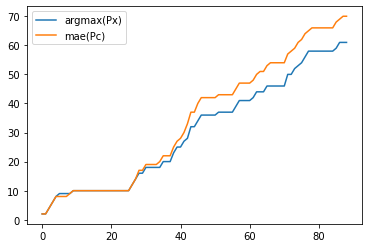

In [70]:
def cum_sum_distr( Px ):
    
    max_num_events = Px.shape[0]-1
    num_windows = Px.shape[1]


    nC = max_num_events*num_windows + 1

#    Pc = np.zeros( [nC,num_windows] )

    minus_inf = np.NINF
    log_Pc = np.empty( [nC,num_windows])
    log_Pc[:] = minus_inf
    
    log_Px = np.log(Px)


    for i in range( max_num_events+1 ):
#         Pc[i,0] = Px[i,0]
         log_Pc[i,0] = log_Px[i,0]

    for j in range(1,num_windows):
        for c in range( nC ):
            tmp = []
            for x in range(min(max_num_events,c)+1 ):
                c_prev = c-x

#                if Pc[c_prev,j-1]>0 and Px[x,j]>0:
#                    Pc[c,j] = Pc[c,j] + Pc[c_prev,j-1]*Px[x,j]

                if log_Pc[c_prev,j-1] > minus_inf and log_Px[x,j]>minus_inf:
                    tmp.append( log_Pc[c_prev,j-1]+log_Px[x,j] )
                    
                    
                if len(tmp) > 0:
                    log_Pc[c,j] = logsumexp( np.array(tmp))
                    

    Pc = np.exp( log_Pc)
                    
    return Pc
        
np.set_printoptions(precision=5,suppress=True)

Pc = cum_sum_distr( Px )


pred1 = np.cumsum(np.argmax(Px,axis=0))
pred2 = np.argmin(np.abs(np.cumsum(Pc,axis=0 ) -0.5 ),axis=0)

print( pred1 )
print(pred2)

plt.figure()
plt.plot(pred1, label='argmax(Px)' )
plt.plot( pred2, label='mae(Pc)')
plt.legend()
